In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../jupyter/environment/rock_density_xray.csv')
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [3]:
df.columns=['signal','density']

<Axes: xlabel='signal', ylabel='density'>

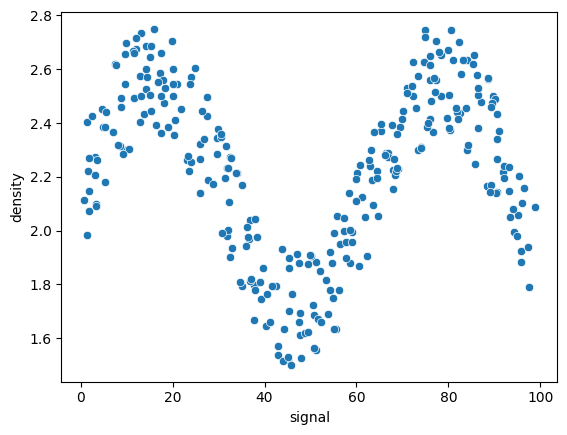

In [4]:
sns.scatterplot(df,y='density',x='signal')

In [5]:
X=df.signal.values.reshape(-1,1)
X.shape
y=df.density

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.1, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model=LinearRegression()

In [11]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [12]:
yHat_lr=lr_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [14]:
MAE=mean_absolute_error(y_test,yHat_lr)
MAE

0.211198973318633

In [15]:
RMSE=np.sqrt(mean_squared_error(y_test,yHat_lr))
RMSE


0.2570051996584629

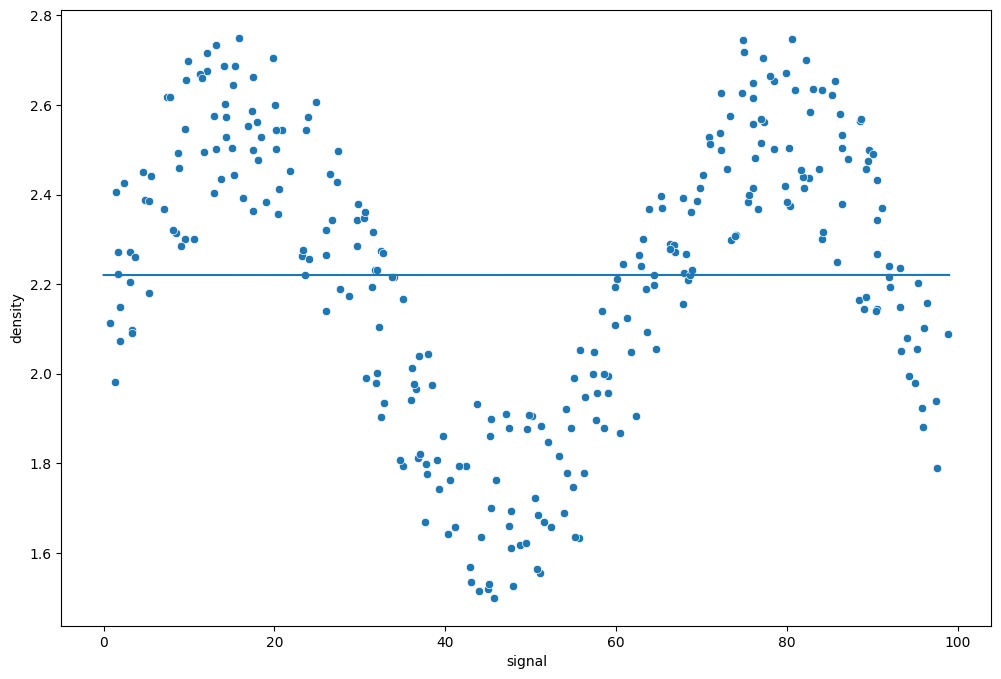

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(df,y='density',x='signal')
signal_range=np.arange(0,100).reshape(-1,1)
pred1=lr_model.predict(signal_range)
plt.plot(signal_range,pred1)

In [17]:
yHat_lr

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [18]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    print(f'rmse: {rmse}')
    mae=mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
    signal_range=np.arange(0,100).reshape(-1,1)
    pred1=model.predict(signal_range)
    plt.figure()
    sns.scatterplot(data=df,x='signal',y='density',color='black')
    
    plt.plot(signal_range,pred1)

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures







# run_model(model,X_train,y_train,X_test,y_test):

In [20]:
pipe=make_pipeline(PolynomialFeatures(degree=7),LinearRegression())


rmse: 0.13617491682462723
mae : 0.11882314503614158


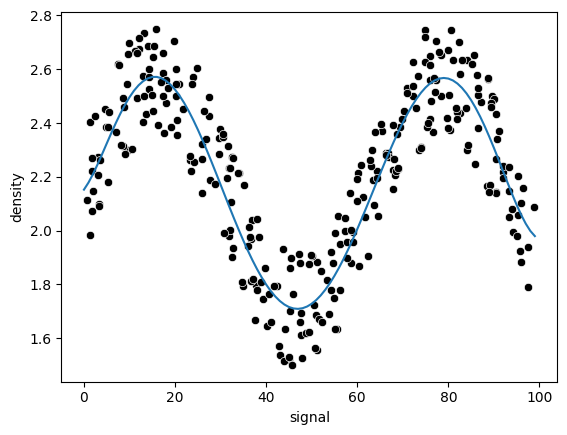

In [21]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

rmse: 0.1523487028635337
mae : 0.11877297474442378
rmse: 0.13730685016923647
mae : 0.12198383614100558
rmse: 0.13277855732740926
mae : 0.11635971693292672
rmse: 0.13351482702752904
mae : 0.11561598074223124


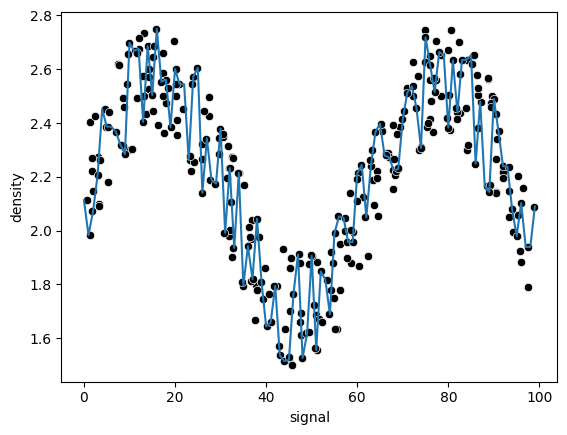

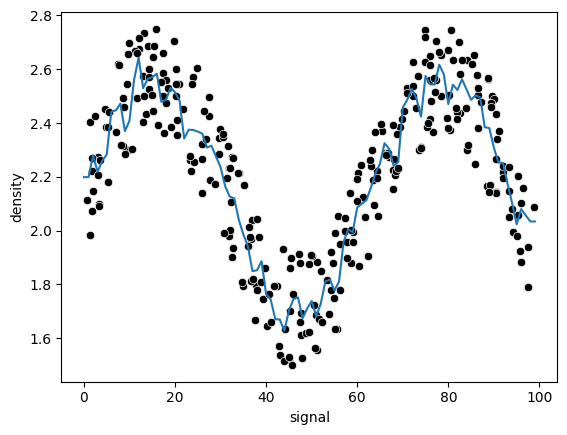

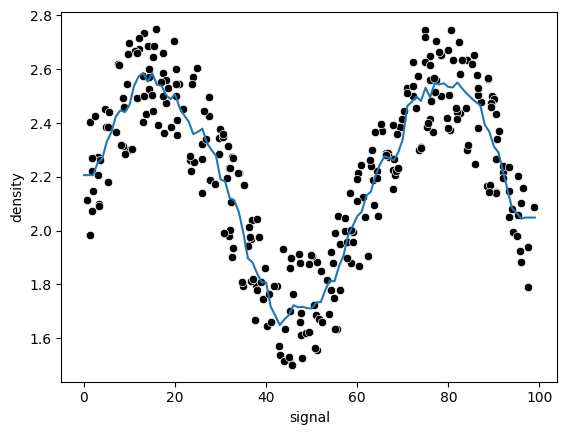

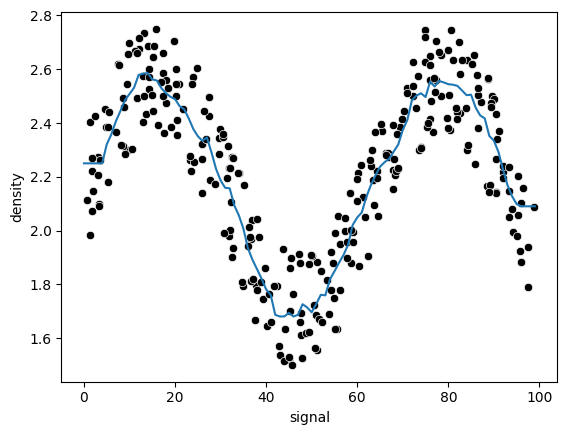

In [23]:
k_values=[1,5,10,15]
for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)
    

In [24]:
from sklearn.tree import DecisionTreeRegressor

rmse: 0.1523487028635337
mae : 0.11877297474442378


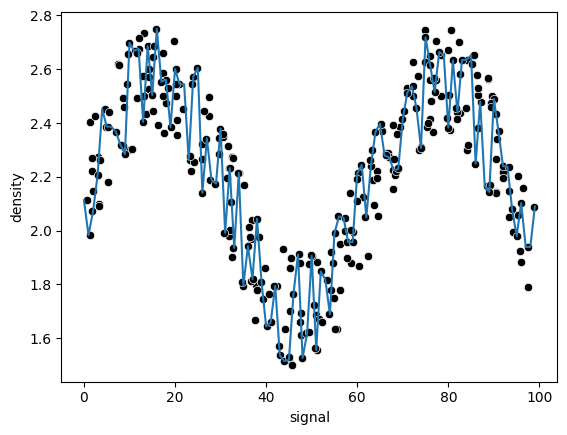

In [25]:
model=DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)



In [26]:
from sklearn.svm import SVR

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
svr=SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
grid=GridSearchCV(svr,param_grid)

rmse: 0.12646999302047557
mae : 0.10854210121349125


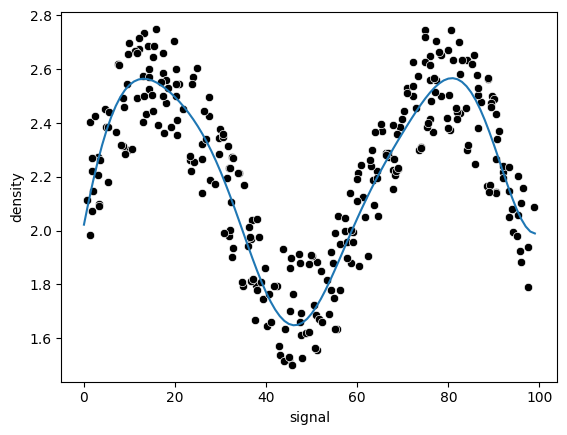

In [29]:
run_model(grid,X_train,y_train,X_test,y_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr=RandomForestRegressor(n_estimators=10)


rmse: 0.13644535795943846
mae : 0.11161867340474303


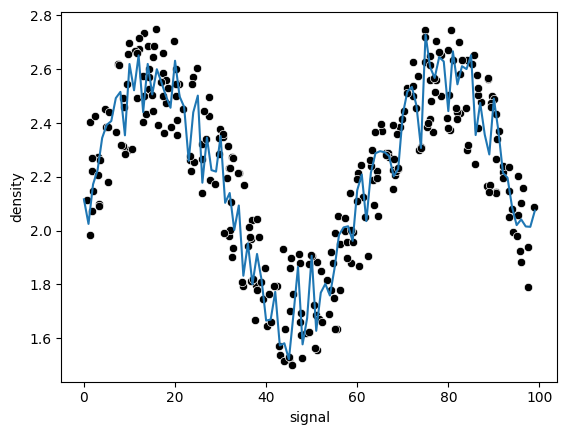

In [32]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

rmse: 0.13294148649584667
mae : 0.11318284854800689


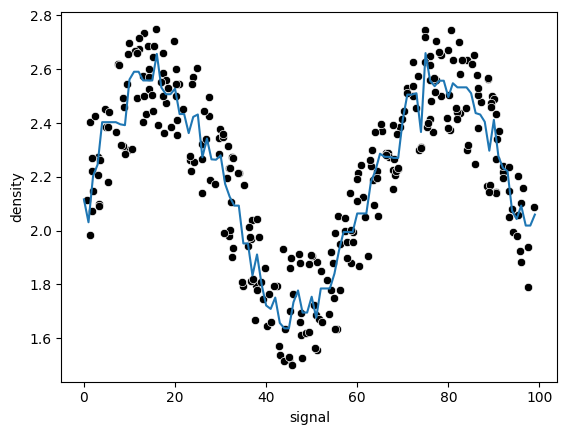

In [34]:
gbr=GradientBoostingRegressor()
run_model(gbr,X_train,y_train,X_test,y_test)

rmse: 0.13461633020630448
mae : 0.11446059224467212


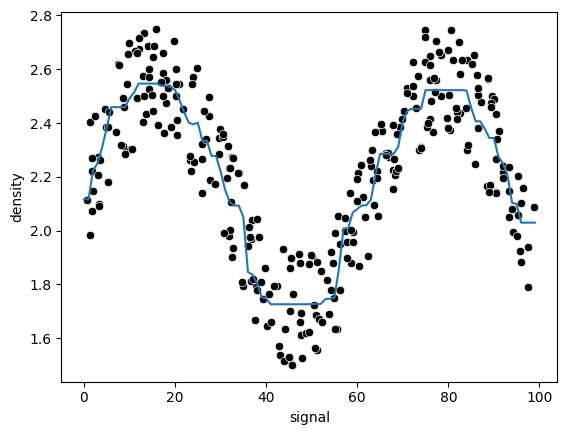

In [35]:
ada=AdaBoostRegressor()
run_model(ada,X_train,y_train,X_test,y_test)

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier(n_estimators=1)